In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.mplot3d import Axes3D
import numpy

## Shape functions on a triangle

In this notebook, we will examine the simple linear shape function on a triangle, often referred to as a "P1" or "Lagrange" element. In order to use the finite element method, we need derivatives of the shape functions, which are easy to derive analytically in this case. 

We can summarise the derivatives for each shape function into a rectangular matrix, and thence form a 3$\times$3 matrix representing the Laplace equation $\nabla^2 u = 0$ on this element. 

Below is a diagram of triangle, defined by three points (i,j,k). The coordinates of each point are ($x_i, y_i$) etc.

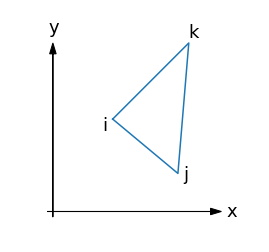

In [2]:
# An illustrative diagram

ax = plt.axes()
plt.gca().set_aspect('equal')
ax.arrow(0.15, 0.1, 0.0, 1.5, head_width=0.06, head_length=0.1, fc='k', ec='k')
ax.text(1.75, 0.11, 'x', size=18)
ax.text(0.11, 1.8, 'y', size=18)
ax.arrow(0.1, 0.15, 1.5, 0.0, head_width=0.06, head_length=0.1, fc='k', ec='k')

x = [0.7, 1.3, 1.4, 0.7]
y = [1.0, 0.5, 1.7, 1.0]

ax.plot(x, y)
ax.text(0.6, 0.9,'i', size=18)
ax.text(1.35, 0.45, 'j', size=18)
ax.text(1.4, 1.75, 'k', size=18)

ax.set_xlim(0,2)
ax.set_ylim(0,2)
plt.axis('off')
plt.show()

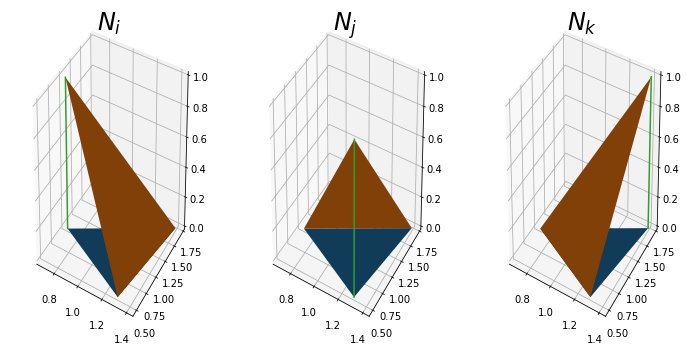

In [3]:
# Visualisation of shape functions in 3D
t1 = tri.Triangulation(x, y, [[0,1,2]])
fig = plt.figure(figsize=(12,6))
for i in range(3):
  ax = fig.add_subplot(131+i, projection='3d')
  ax.plot_trisurf(t1,[0,0,0]);
  ax.plot_trisurf(t1,[i==0,i==1,i==2]);
  ax.plot([x[i],x[i]], [y[i],y[i]], [0, 1])
  ax.set_title('$N_%s$'%['i','j','k'][i], size=24)


Remember that a piecewise approximation of our function can be made by summing weighted 'shape functions', as illustrated above:

$$ T_{piecewise}(x) = \sum_i T_i N_i(x) $$

The 'shape function' for a linear triangular element is a simple linear function:
$$N_i = {x_j y_k - x_k y_j + (y_j - y_k) {\bf x} + (x_k - x_j) {\bf y}\over 2 A_{tri}}$$

where $A_{tri}$ is the triangle area (we can calculate that with a cross product of two edges).

The spatial derivative $\nabla N_i$ is given by:
    
$$ \nabla N_i = \left[\begin{array}{c}
(y_j - y_k) \\ 
(x_k - x_j)
\end{array}\right] / 2A_{tri} $$

We can write down the gradient of all three shape functions as a 2$\times$3 matrix:

$$ B = \left[\begin{array}{c} \nabla N_i  & \nabla N_j & \nabla N_k\end{array} \right] 
     = \left[\begin{array}{c} (y_j - y_k) & (y_k - y_i) & (y_i - y_j) \\
                                              (x_k - x_j) & (x_i - x_k)  & (x_j - x_i) \end{array} \right]/ 2A_{tri}$$

Previously, in our 1D example, we only had 2 overlapping shape functions in each element, resulting in a 2$\times$2 matrix. Now we have 3.
Now, since B is constant over the triangle, we get the local element matrix: $$ K_{ij} = \int \nabla N_i \cdot \nabla N_j\ d\Omega = B^T B A_{tri}$$

B =
[[-1.55844156  0.90909091  0.64935065]
 [ 0.12987013 -0.90909091  0.77922078]]
B^T.B =
[[ 2.44560634 -1.53482881 -0.91077753]
 [-1.53482881  1.65289256 -0.11806375]
 [-0.91077753 -0.11806375  1.02884129]]


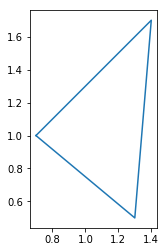

In [4]:
def compute_B(x, y):
    # Element area Ae
    Ae = 0.5*abs((x[0] - x[1])*(y[2] - y[1]) - (y[0] - y[1])*(x[2] - x[1]))

    # 'B' Matrix - representing the 'gradient' operator
    Bmat = numpy.array([[y[1] - y[2], y[2] - y[0], y[0] - y[1]],
                        [x[2] - x[1], x[0] - x[2], x[1] - x[0]]])/(2*Ae)
    
    return Bmat

B = compute_B(x, y)
print('B =')
print(B)
print('B^T.B =')
print(numpy.matmul(B.T, B))
plt.plot(x, y)
plt.gca().set_aspect('equal')
plt.show()

Note that $B^TB$ is symmetric, as might be expected. Let's try some different geometries:

B =
[[-0.8660254  0.8660254  0.       ]
 [-0.5       -0.5        1.       ]]
B^T.B =
[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]


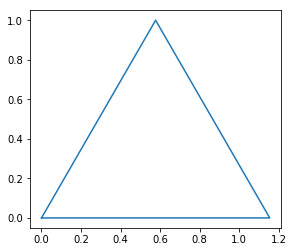

In [5]:
# An equiliateral triangle
x = numpy.array([0.0, 2.0, 1.0, 0.0])/numpy.sqrt(3.0)
y = numpy.array([0.0, 0.0, 1.0, 0.0])
B = compute_B(x, y)
print('B =')
print(B)
print('B^T.B =')
print(numpy.matmul(B.T, B))
plt.plot(x, y)
plt.gca().set_aspect('equal')
plt.show()

Looks nice!

B =
[[-5.000e-04  5.000e-04  0.000e+00]
 [-9.995e-01 -5.000e-04  1.000e+00]]
B^T.B =
[[ 9.990005e-01  4.995000e-04 -9.995000e-01]
 [ 4.995000e-04  5.000000e-07 -5.000000e-04]
 [-9.995000e-01 -5.000000e-04  1.000000e+00]]


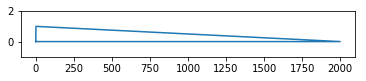

In [6]:
# An very thin triangle
x = numpy.array([0.0, 2000.0, 1.0, 0.0])
y = numpy.array([0.0, 0.0, 1.0, 0.0])
B = compute_B(x, y)
print('B =')
print(B)
print('B^T.B =')
print(numpy.matmul(B.T, B))
plt.plot(x, y)
plt.gca().set_aspect(100)
plt.ylim(-1,2)
plt.show()

Note the large variation on the diagonal - this can lead to ill-conditioned matrices.